In [18]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

import xml.etree.ElementTree as ET

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from matplotlib import pyplot as plt
from matplotlib import style

# the code below sets the text to LaTEX font
plt.rcParams['text.usetex'] = True
# the code below sets the default figure and text size for all plots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

custom_palette = sns.color_palette("icefire")

In [19]:
tree = ET.parse('Library.xml')
root = tree.getroot()

root.tag

root.attrib

main_dict=root.findall('dict')

for index, item in enumerate(list(main_dict[0])):  
    print('index #{} = <{}>'.format(index, item.tag))
    if item.tag=="dict":
        print('The tracks dict has been found!')
        tracks_dict=item
        break

tracklist=list(tracks_dict.findall('dict'))

len(tracklist) # this is the number of tracks in the library

kinds=set([])
for i in range(len(tracklist)):
  for j in range(len(tracklist[i])):
    if (tracklist[i][j].tag=="key" and tracklist[i][j].text=="Kind"):
      kinds.add(tracklist[i][j+1].text)

kinds=pd.Series(list(kinds))
kinds

kinds_i_want = pd.Series(['HLS media', 
                          'Apple Music AAC audio file', 
                          'AAC audio file', 
                          'WAV audio file', 
                          'MPEG-4 video file'])

# This code will retrieve all the 'keys' (attributes) of the first track of the corresponding Kind
def cols(kind):
    cols=[]
    kind_found=False
    for i in range(len(tracklist)):
        for j in range(len(tracklist[i])):
            if tracklist[i][j].tag=="key":
                cols.append(tracklist[i][j].text)
            if (tracklist[i][j].text=="Kind" and tracklist[i][j+1].text==kind):
                kind_found=True
        if kind_found:
          return set(cols)
              

cols('Apple Music AAC audio file')

results = map(cols, kinds_i_want)
results_list = [list(item) for item in results]

flat_list=[]
for item in results_list:
  for sub_item in item:
    flat_list.append(sub_item)

unique_cols=set(flat_list)
unique_cols
len(unique_cols)

df_tracks=pd.DataFrame(columns=list(unique_cols))

dict1={}

for song_i in range(len(tracklist)):
  for attribute_i in range(len(tracklist[song_i])):
    if tracklist[song_i][attribute_i].tag=="key":
      dict1[tracklist[song_i][attribute_i].text]=tracklist[song_i][attribute_i+1].text
  list_values=[i for i in dict1.values()]
  list_keys=[j for j in dict1.keys()]
  if dict1['Kind'] in kinds_i_want.unique():
    df_temp=pd.DataFrame([list_values],columns=list_keys)
    df_tracks=pd.concat([df_tracks,df_temp],axis=0,ignore_index=True,sort=True)

index #0 = <key>
index #1 = <integer>
index #2 = <key>
index #3 = <integer>
index #4 = <key>
index #5 = <date>
index #6 = <key>
index #7 = <string>
index #8 = <key>
index #9 = <integer>
index #10 = <key>
index #11 = <true>
index #12 = <key>
index #13 = <string>
index #14 = <key>
index #15 = <string>
index #16 = <key>
index #17 = <dict>
The tracks dict has been found!


In [20]:
df_tracks

,Album,Album Artist,Album Loved,Apple Music,Artist,Artwork Count,Bit Rate,Clean,Compilation,Composer,...,Sort Album Artist,Sort Artist,Sort Composer,Sort Name,Total Time,Track Count,Track ID,Track Number,Track Type,Year
0,I Don’t Live Here Anymore (Deluxe Edition),The War on Drugs,NaN,None,The War on Drugs,1,256,NaN,NaN,Adam Granduciel,...,War on Drugs,War on Drugs,NaN,Occasional Rain,294040,12,922,10,Remote,2021
1,Tell Me It's Real (Expanded Edition),Seafret,NaN,None,Seafret,1,256,NaN,NaN,"Harry Draper, Jack Sedman & Roy Stride",...,War on Drugs,Seafret,NaN,Oceans,215667,16,924,5,Remote,2015
2,Numinous,Those Who Ride With Giants,NaN,None,Those Who Ride With Giants,1,256,NaN,NaN,"Harry Draper, Jack Sedman & Roy Stride",...,War on Drugs,Those Who Ride With Giants,NaN,Promise of the Setting Sun,246288,10,926,3,Remote,2016
3,Reverence for Fallen Trees,The Black Atlantic,NaN,None,The Black Atlantic,1,256,NaN,NaN,"Harry Draper, Jack Sedman & Roy Stride",...,Black Atlantic,Black Atlantic,NaN,Baiulus,96487,10,928,1,Remote,2009
4,My Head Is an Animal,Of Monsters and Men,NaN,None,Of Monsters and Men,1,256,NaN,NaN,Nanna Bryndís Hilmarsdóttir & Ragnar Þórhallsson,...,Black Atlantic,Of Monsters and Men,NaN,Little Talks,266640,13,930,6,Remote,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Mahal - EP,Glass Beams,NaN,None,Glass Beams,1,256,NaN,NaN,Glass Beams,...,Avalanches,Glass Beams,Strokes,Mahal,201339,5,2611,2,Remote,2024
811,Worth the Wait - EP,The Snails,NaN,None,The Snails,1,256,NaN,NaN,"Andy Abelow, April Camlin, William Cashion, Sa...",...,Snails,Snails,Strokes,Big Boy,172453,5,2613,1,Remote,2014
812,Kiasmos,Kiasmos,NaN,None,Kiasmos,1,256,NaN,NaN,Ólafur Arnalds & Janus Rasmussen,...,Snails,Kiasmos,Strokes,Lit,384763,8,2615,1,Remote,2014
813,Singles,Future Islands,NaN,None,Future Islands,1,256,NaN,NaN,"Gerrit Welmers, Samuel T. Herring & William Ca...",...,Snails,Future Islands,Strokes,Seasons (Waiting On You),226440,10,6111,1,Remote,2014


In [21]:
# Assuming your DataFrame is named df and has an "Album Artist" column
# Count the occurrences of each artist
artist_counts = df_tracks['Album Artist'].value_counts().reset_index()
artist_counts.columns = ['Album Artist', 'Count']  # Rename the columns for clarity
artist_counts

,Album Artist,Count
0,William Basinski,58
1,The National,50
2,Death Cab for Cutie,39
3,Bon Iver,34
4,The Avalanches,33
...,...,...
293,Øneheart & reidenshi,1
294,Mild High Club,1
295,Seafret,1
296,Foxwarren,1


In [27]:
# Function to escape only necessary LaTeX special characters
def escape_latex(text):
    special_chars = {'&': r'\&', '%': r'\%', '$': r'\$', '#': r'\#', '_': r'\_', '{': r'\{', '}': r'\}', '~': r'\textasciitilde{}', '^': r'\^{}'}
    for char, escape in special_chars.items():
        text = text.replace(char, escape)
    return text

top_artists = artist_counts.head(10)
# Apply the escaping function to the artist names
top_artists['Album Artist'] = top_artists['Album Artist'].apply(escape_latex)


/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_11770/682770905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists['Album Artist'] = top_artists['Album Artist'].apply(escape_latex)


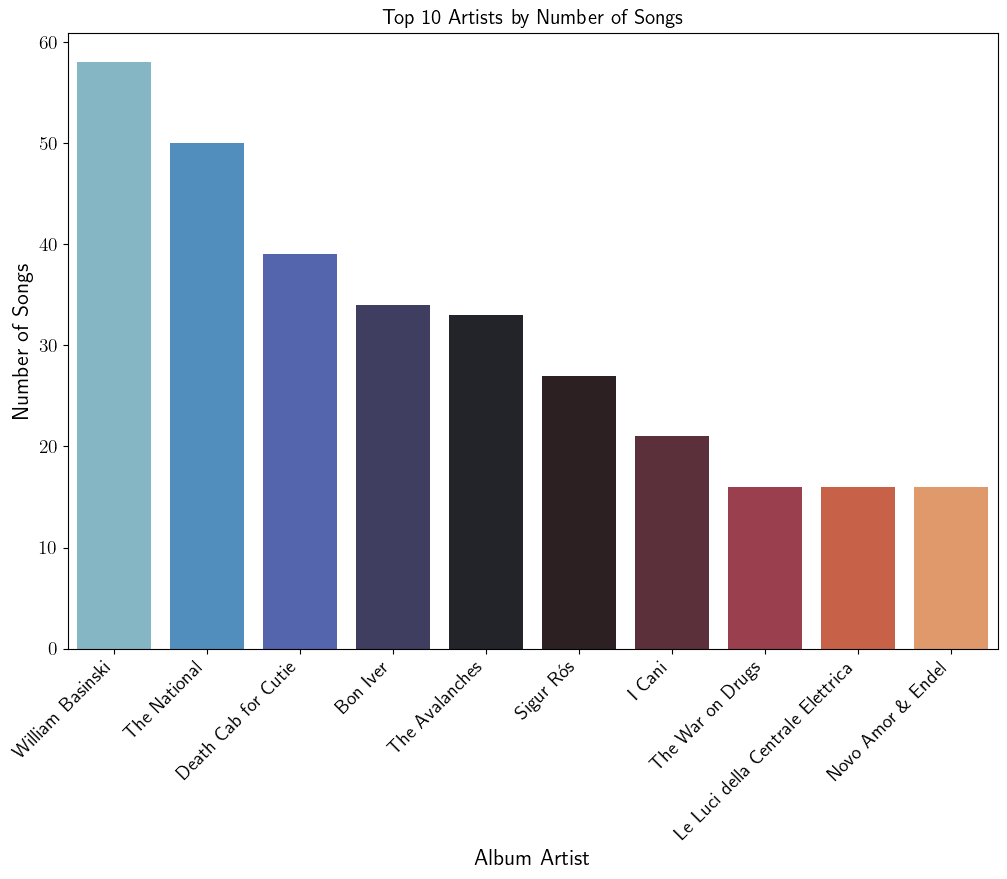

In [29]:
# Assuming top_artists is already defined and contains the top 10 artists
# Create the bar plot for the top 10 artists
sns.barplot(data=top_artists, 
            x='Album Artist', 
            y='Count',
            hue='Album Artist',
            palette='icefire',
            legend=False)  # Use a color palette for better visualization

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better readability
plt.title('Top 10 Artists by Number of Songs', fontsize=15)
plt.xlabel('Album Artist')
plt.ylabel('Number of Songs')

# Save the plot
plt.savefig('notebook_images/top_10_artists_histogram.png', 
            bbox_inches='tight')

# Show the plot
plt.show()